# Machine Learning Exercises in Python
# Part 1: Simple Linear Regression

http://www.johnwittenauer.net/machine-learning-exercises-in-python-part-1/

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

ex_dir = lambda n: '~/courses/Machine Learning/machine-learning-ex{}/ex{}'.format(n, n)

## Visualising the Data

In [2]:
path = ex_dir(1) + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
# The "describe" function calculates some basic statistics on a data set. 
# This is helpful to get a "feel" for the data during the exploratory analysis stage of a project.

data.describe()  

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


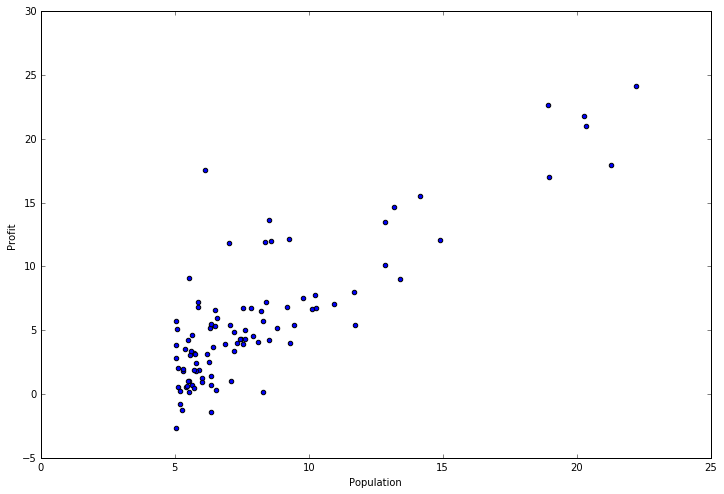

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))  

## Running Gradient Descent

In [5]:
def computeCost(X, y, theta):
    error = np.power(X * theta.T - y, 2)
    return np.sum(error) / (2 * len(X))

In [6]:
# append ones to the data (X) to account for the intercept term
# df.insert(index, name, values)
data.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
# iloc -> Select row by integer location
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [7]:
# convert from data frames to numpy matrices
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.matrix(np.array([0, 0]))

Useful memo: `(i x j) * (j x k) = (i x k)`

Good to check matrix shapes for debugging: `X.shape` 

In [8]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [9]:
computeCost(X, y, theta)

32.072733877455676

In [10]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - alpha / X.shape[0] * np.sum(term)
        
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [11]:
# initialize variables for learning rate and iterations
alpha = 0.01  
iters = 1000

# perform gradient descent to "fit" the model parameters
final_theta, cost = gradientDescent(X, y, theta, alpha, iters)  
final_theta

matrix([[-3.24140214,  1.1272942 ]])

## Plotting the Learnt Model

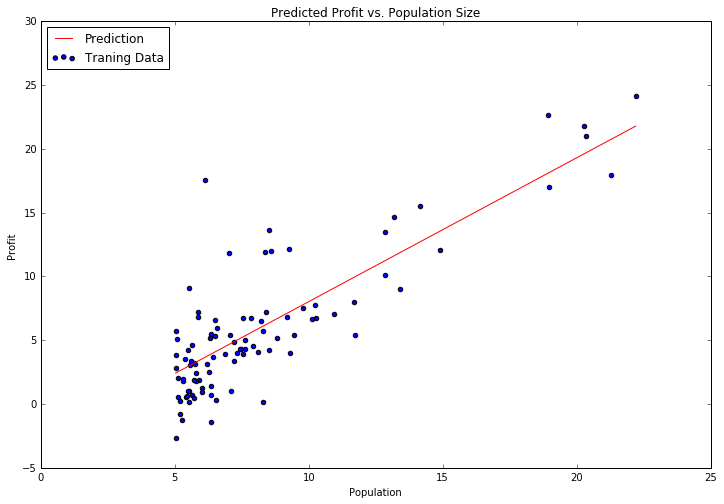

In [12]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = final_theta[0,0] + final_theta[0,1] * x

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')  
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  

## Plotting the cost function

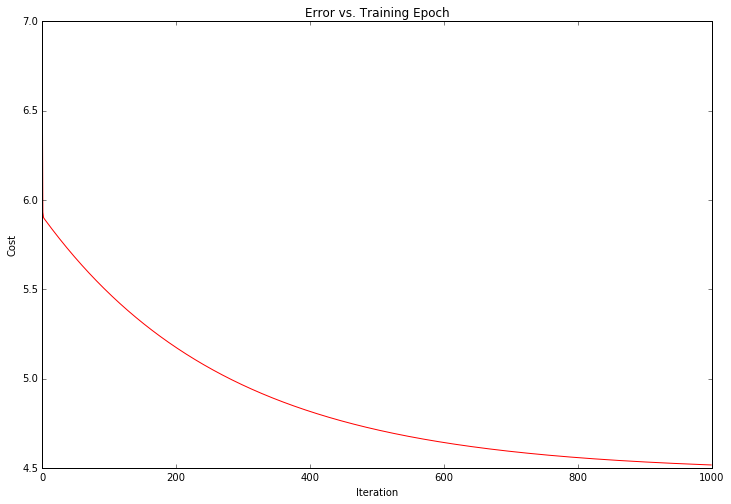

In [13]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')  

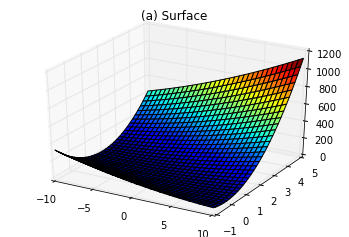

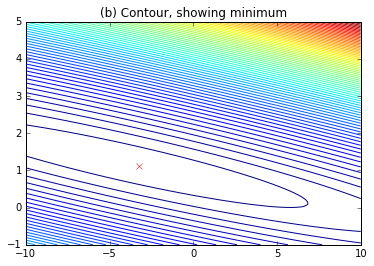

In [115]:
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from mpl_toolkits.mplot3d import axes3d

f = lambda t : [
    [computeCost(X, y, np.matrix(t[i,j])) for j in range(t.shape[1])] 
    for i in range(t.shape[0])
]

xmesh, ymesh = np.mgrid[-10.0:10.0:100j,-1.0:5.0:100j]
meshstack = np.dstack((xmesh,ymesh))
fmesh = f(meshstack)

fig1 = plt.figure()
ax = fig1.gca(projection="3d")
ax.plot_surface(xmesh, ymesh, fmesh, rstride=3, cstride=3, cmap=cm.jet)
plt.title('(a) Surface')

fig2 = plt.figure()
plt.plot(final_theta[0,0], final_theta[0,1], 'xr')
plt.contour(xmesh, ymesh, fmesh, 75)
plt.title('(b) Contour, showing minimum')

## Linear Fit with scikit-learn

In [117]:
from sklearn import linear_model  
model = linear_model.LinearRegression()  
# X, y = prepareData(data)
model.fit(X, y) 

/Users/joanne/miniconda2/envs/py35/lib/python3.5/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

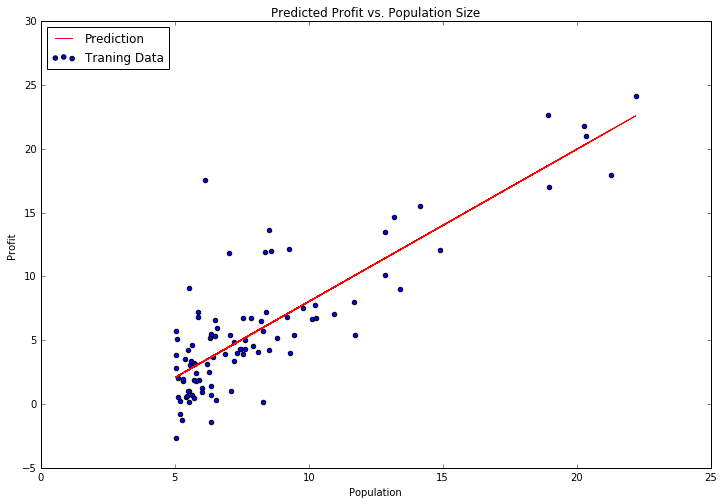

In [118]:
x = np.array(X[:, 1].A1)  
f = model.predict(X).flatten()

fig, ax = plt.subplots(figsize=(12,8))  
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')  
ax.legend(loc=2)  
ax.set_xlabel('Population')  
ax.set_ylabel('Profit')  
ax.set_title('Predicted Profit vs. Population Size')  